In [14]:
# Build an LSTM 
# one for the streamflow prediction. 
# the other for the image classification. 
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from typing import Dict, List, Tuple
from random import random
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

# Streamflow Prediction
To forecast streamflow from weather drivers, we'll use 2 machine learning models to achieve it. We've implemented an artificial neural network to do it in our last workshop. Now we'll implement a state of art ML model (RNN (recurrent neural network) model). We'll start by reviewing the ANN model as a baseline approach. The RNN will be a state of the art data driven model for streamflow approach. We'll clearly see the advantage of LSTM over ANN after checking the results by plotting the predicted streamflow from both models. This advantage of RNN over ANN in terms of the streamflow prediction is because of the nature of streamflow prediction, which obeys the watershed storgae discharge relationship that characterizes a system memory feature. This characterization perfectly fits the motivation in designing RNNs. 
## ANN 
Now let's review our ANN model performance. This code is exactly the same as what we saw in our 2nd workshop. 

In [15]:
# load in the data. 
# streamflow ann. 
# preprocess the data. Normalzie them.
# preprocess our data to make sure they're in the similar sclaes. -----------
q_df = pd.read_csv('./streamflow.csv')
q_df['Date'] = pd.to_datetime(q_df['Date'])
q_df = q_df.set_index('Date')
q_df_mean = q_df.mean()
q_df_std  = q_df.std()
q_df = (q_df - q_df_mean)/q_df_std

# train and test data split. ----------------
def split_train_test(ratio: int, df: pd.DataFrame, shuffle: bool) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    This function will split the data into training and testing sets. 
    The ratio of this train/test split is the input argument.
    """
    train_rows = int(df.shape[0] * ratio)
    test_rows = df.shape[0] - train_rows
    
    # shuffle the data frame completely. 
    if shuffle:
        df = df.sample(frac = 1)
    
    return df.iloc[0:train_rows], df.iloc[train_rows:(train_rows + test_rows)]

# train and test split. 
trn, tst = split_train_test(.6, q_df, False)  


ANN = Sequential()
ANN.add(Dense(32, input_dim = 6, activation = 'relu'))
ANN.add(Dense(32, activation = 'relu'))
ANN.add(Dense(1))


opt = SGD(learning_rate=0.1)
# compile the model
ANN.compile(loss='mean_squared_error', optimizer = opt)

# training the model. -----------
history = ANN.fit(trn[['PRECIPmm', 'TMP_MNdgC', 'TMP_MXdgC', 'WINDM/s', 'RHmd', 'SOLARMJ/m2']].values, 
                   trn.Q.values, 
                    validation_data = (
                        tst[['PRECIPmm', 'TMP_MNdgC', 'TMP_MXdgC', 'WINDM/s', 'RHmd', 'SOLARMJ/m2']].values, 
                        tst.Q.values
                    ),
                   epochs=200,
                   batch_size = 200)

Epoch 1/200
11/11 [==============================] - 0s 27ms/step - loss: 0.8413 - val_loss: 0.3469
Epoch 2/200
11/11 [==============================] - 0s 5ms/step - loss: 0.5129 - val_loss: 0.9301
Epoch 3/200
11/11 [==============================] - 0s 7ms/step - loss: 0.6283 - val_loss: 0.3550
Epoch 4/200
11/11 [==============================] - 0s 5ms/step - loss: 0.5649 - val_loss: 0.2869
Epoch 5/200
11/11 [==============================] - 0s 5ms/step - loss: 0.4208 - val_loss: 0.3186
Epoch 6/200
11/11 [==============================] - 0s 5ms/step - loss: 0.4200 - val_loss: 0.2740
Epoch 7/200
11/11 [==============================] - 0s 5ms/step - loss: 0.7044 - val_loss: 0.2724
Epoch 8/200
11/11 [==============================] - 0s 5ms/step - loss: 0.4408 - val_loss: 0.3416
Epoch 9/200
11/11 [==============================] - 0s 6ms/step - loss: 0.3790 - val_loss: 0.3080
Epoch 10/200
11/11 [==============================] - 0s 5ms/step - loss: 0.3904 - val_loss: 0.2793
Epoch 11

Epoch 83/200
11/11 [==============================] - 0s 6ms/step - loss: 0.3557 - val_loss: 0.2601
Epoch 84/200
11/11 [==============================] - 0s 7ms/step - loss: 0.3342 - val_loss: 0.2618
Epoch 85/200
11/11 [==============================] - 0s 7ms/step - loss: 0.3289 - val_loss: 0.2614
Epoch 86/200
11/11 [==============================] - 0s 6ms/step - loss: 0.3668 - val_loss: 0.4119
Epoch 87/200
11/11 [==============================] - 0s 6ms/step - loss: 0.5177 - val_loss: 0.2646
Epoch 88/200
11/11 [==============================] - 0s 6ms/step - loss: 0.3363 - val_loss: 0.3363
Epoch 89/200
11/11 [==============================] - 0s 5ms/step - loss: 0.4050 - val_loss: 0.3549
Epoch 90/200
11/11 [==============================] - 0s 6ms/step - loss: 0.3370 - val_loss: 0.3030
Epoch 91/200
11/11 [==============================] - 0s 6ms/step - loss: 0.3384 - val_loss: 0.2800
Epoch 92/200
11/11 [==============================] - 0s 7ms/step - loss: 0.3277 - val_loss: 0.2646


Epoch 164/200
11/11 [==============================] - 0s 5ms/step - loss: 0.3709 - val_loss: 0.2863
Epoch 165/200
11/11 [==============================] - 0s 5ms/step - loss: 0.3350 - val_loss: 0.2656
Epoch 166/200
11/11 [==============================] - 0s 5ms/step - loss: 0.3396 - val_loss: 0.3246
Epoch 167/200
11/11 [==============================] - 0s 5ms/step - loss: 0.3251 - val_loss: 0.3042
Epoch 168/200
11/11 [==============================] - 0s 6ms/step - loss: 0.3189 - val_loss: 0.3203
Epoch 169/200
11/11 [==============================] - 0s 7ms/step - loss: 0.3142 - val_loss: 0.2990
Epoch 170/200
11/11 [==============================] - 0s 9ms/step - loss: 0.3546 - val_loss: 0.3090
Epoch 171/200
11/11 [==============================] - 0s 10ms/step - loss: 0.3529 - val_loss: 0.2993
Epoch 172/200
11/11 [==============================] - 0s 6ms/step - loss: 0.3261 - val_loss: 0.2653
Epoch 173/200
11/11 [==============================] - 0s 7ms/step - loss: 0.3653 - val_lo

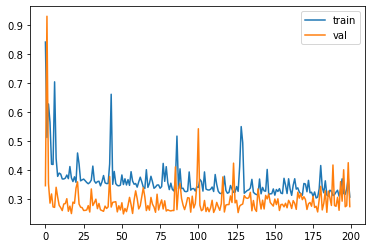

In [16]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'val')
plt.legend()

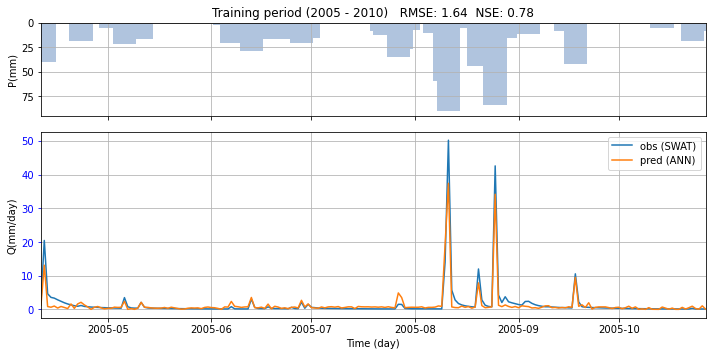

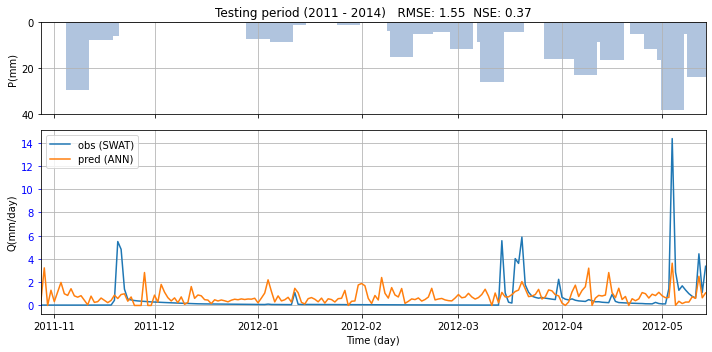

In [17]:
def pred_streamflow(model, train, test):
    """
    Args: 
    model: keras model object
    train: training data in a format that suits the model
    test: testing data in a format that suits the model
    
    Returns:
    predicted discharge data frame (one for training evaluation, the other is the testing evaluation)
    Evalluate the model.
    """
    
    # During training period. 
    def cal_q(df: pd.DataFrame):
        """
        Given a dataframe (either training or testing) that has all weather drivers and q
        returns a dataframe with additional one column (pred_q)
        """
        pred = model.predict(df[['PRECIPmm', 'TMP_MNdgC', 'TMP_MXdgC', 'WINDM/s', 'RHmd', 'SOLARMJ/m2']]).flatten()
        pred = pred * q_df_std.Q + q_df_mean.Q # normalize back to a meaningful range. 
        pred[pred < .0] = .0 # lower bound of the prediction is 0. Negative predicted discharge is postprocessed and forced to a range [0, +OO]
        
        result = df.copy()
        result = result * q_df_std + q_df_mean
        result['ann'] = pred
        
        return result
    
    def visualize_plot(df: pd.DataFrame, start: int, end: int, prefix: str):
        """
        df is the result that has both swat discharge and predicted discharge. 
        start and end indexes the starting and ending date of the visualization
        prefix is the leading string that names the title of plots. 
        """
        
        # calculate some stats: 
        rmse = np.sqrt(np.mean((df.Q - df.ann)**2))
        
        # calculate NSE
        def nse():
            denominator = np.mean((df.Q - np.mean(df.Q))**2)
            numerator = np.mean((df.ann - df.Q)**2)
            
            return 1 - numerator/denominator
        
        nse = nse()
            
        t = df.index[start:end]
        sP = df.PRECIPmm[start:end]

        #     fig = plt.figure(figsize = (20,10))
        fig = plt.figure(figsize = (10,5))
        gs = gridspec.GridSpec(2, 1, height_ratios=[1, 2])

        # HYDROGRAM CHART
        ax = plt.subplot(gs[1])
        ax.plot(t,df.Q[start:end], label = 'obs (SWAT)')
        ax.plot(t,df.ann[start:end], label = 'pred (ANN)')
        ax.set_ylabel(u'Q(mm/day)', color='black')
        ax.set_xlabel('Time (day)')
        ax.tick_params(axis='y', colors='b')
        ax.xaxis.grid(b=True, which='major', color='.7', linestyle='-')
        ax.yaxis.grid(b=True, which='major', color='.7', linestyle='-')
        ax.set_xlim(min(t), max(t))    
        #     ax.set_ylim(0, np.max(list(plot_df.qsim.iloc[0:600]) + list(plot_df.to_bs.iloc[0:600]))*1.2)

        # PRECIPITATION/HYETOGRAPH CHART
        ax2 = plt.subplot(gs[0])
        ax2.bar(t, sP, 7, color='#b0c4de')
        ax2.xaxis.grid(b=True, which='major', color='.7', linestyle='-')
        ax2.yaxis.grid(b=True, which='major', color='0.7', linestyle='-')
        ax2.set_ylabel('P(mm)')
        ax2.set_xlim(min(t), max(t))
        plt.setp(ax2.get_xticklabels(), visible=False)

        plt.tight_layout()
        ax2.invert_yaxis()
        plt.gcf().subplots_adjust(bottom=0.15)
        plt.title(prefix + '   RMSE: ' + str(round(rmse, 2)) + '  NSE: ' + str(round(nse, 2)))
        ax.legend()
    
    
    # Now execute those 2 functions. 
    df_trn = cal_q(df = train)
    visualize_plot(df = df_trn, start = 100, end = 300, prefix='Training period (2005 - 2010)')
    
    df_tst = cal_q(df = test)
    visualize_plot(df = df_tst, start = 300, end = 500, prefix='Testing period (2011 - 2014)')
    
    return df_trn, df_tst

_, ann_tst = pred_streamflow(ANN, trn, tst)


The model evaluation tells that testing performance is worse than the training performance, which is consisten to any machine learning model because it is those training data that optimzes and updates the model. In other words, the model saw training data and did not see testing data. We shall focus on the testing performance because that'll give answer towards this question "How will this trained machine leraning model perform to achive the prediction task". In the streamflow prediction task, that question becomes: "Given a future day where weather drivers are available, how accurate will this machine learning model perofrm"?

We also observed that peak discharge seems frequently mis-predicted. In addition, in low flow regimes (ice period), predicted streamflow fluctuate as a response to weather drivers (mainly precipitation). This performance deviates from the observation (SWAT) that streamflow shall be zero. 

## RNN (LSTM)

What ANN achieves is to predict streamflow on any given day using the weather drivers on that specific day. The model predicts daily discharge from daily weather on the same day. It does not have memory on previous history of watershed. However, it is inconsisten with the streamflow generation process. Streamflow is the water yield of the watershed as a release of watershed water storage. The precipitaiton on current day might likely not have a response on current day's discharge. On the contray, precipitation might infiltrate to the soil and then leak to the groundwater aquifer. Subsurface flow from soil mositure, or baseflow from the aquifer will discharge to the stream after a period of time. This temporal inconsistency between rainfall and streamflow is not captured by the Artificial neural network and motivates another application of an appropriate machine learning architecture that suits our streamflow prediction's task. 

Recurrent neural network is a perfect candidate and we'll implement it.

We'll use a sub-family in RNN called LSTM (long short term memory) to implement it. Furthermore, LSTM is a current state-of-art ML architecture for streamflow prediction. The recurrence computation utilizes the data more powerful. Instead of predicting daily streamflow from weather drivers on the same date, we'll use past historical weather drivers to predict current date's discharge. In a simplistic form, we're doing a many-to-one prediction. 

In [18]:
# This many to one prediction will format the data in a different fashion. 
# many to one prediction. 
# Preprocess the data. 
global_setting = {'batch': 500, 
                 'time_steps': 360, 
                 'epoch': 100, 
                 'lr': .01}


def create_dataset(X, y, time_steps):
    X_new, y_new= [], []

    for i in range(0, len(X) - time_steps, 1):  # moving one at a time to create data chunks. 
        X_temp = X.iloc[i:(i + time_steps)].values  # slice the data for one timestamp
        y_temp = y.iloc[i + time_steps-1] # attention on the -1 due to the python indexing style. 

        X_new.append(X_temp)
        y_new.append(y_temp)

    return np.array(X_new), np.array(y_new)


# create X and y from both training and testing period. 
X_train, y_train = create_dataset(X = trn[['PRECIPmm', 'TMP_MNdgC', 'TMP_MXdgC', 'WINDM/s', 'RHmd', 'SOLARMJ/m2']], 
                                  y = trn[['Q']], time_steps=global_setting['time_steps'])
X_test, y_test = create_dataset(X = tst[['PRECIPmm', 'TMP_MNdgC', 'TMP_MXdgC', 'WINDM/s', 'RHmd', 'SOLARMJ/m2']], 
                                  y = tst[['Q']], time_steps=global_setting['time_steps'])

In [22]:
X_train.shape

(1831, 360, 6)

In [20]:
lstm = Sequential()
lstm.add(LSTM(units=70, input_shape = (X_train.shape[1], X_train.shape[2])))
lstm.add(Dense(units = 1))
lstm.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 70)                21560     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 71        
Total params: 21,631
Trainable params: 21,631
Non-trainable params: 0
_________________________________________________________________


In [21]:
# opt = SGD(learning_rate = 0.1)
opt = Adam(learning_rate = global_setting['lr'])
# compile the model
lstm.compile(loss='mean_squared_error', optimizer = opt)

# fit model
history = lstm.fit(X_train, y_train, 
                    validation_data = (X_test, y_test),
                   epochs=global_setting['epoch'],
                   batch_size = global_setting['batch'])

Epoch 1/100
4/4 [==============================] - 9s 2s/step - loss: 1.3176 - val_loss: 0.5883
Epoch 2/100
4/4 [==============================] - 8s 2s/step - loss: 1.0633 - val_loss: 0.4370
Epoch 3/100
4/4 [==============================] - 7s 2s/step - loss: 0.9268 - val_loss: 0.3940
Epoch 4/100
4/4 [==============================] - 8s 2s/step - loss: 0.8348 - val_loss: 0.3860
Epoch 5/100
4/4 [==============================] - 6s 1s/step - loss: 0.7705 - val_loss: 0.3952
Epoch 6/100
4/4 [==============================] - 6s 2s/step - loss: 0.6920 - val_loss: 0.3611
Epoch 7/100
4/4 [==============================] - 7s 2s/step - loss: 0.6326 - val_loss: 0.3689
Epoch 8/100
4/4 [==============================] - 6s 2s/step - loss: 0.5987 - val_loss: 0.3353
Epoch 9/100
4/4 [==============================] - 6s 2s/step - loss: 0.5608 - val_loss: 0.3736
Epoch 10/100
4/4 [==============================] - 6s 2s/step - loss: 0.5383 - val_loss: 0.3149
Epoch 11/100
4/4 [=====================

4/4 [==============================] - 7s 2s/step - loss: 0.0062 - val_loss: 0.2580
Epoch 86/100
4/4 [==============================] - 9s 2s/step - loss: 0.0060 - val_loss: 0.2619
Epoch 87/100
4/4 [==============================] - 6s 2s/step - loss: 0.0058 - val_loss: 0.2680
Epoch 88/100
4/4 [==============================] - 6s 2s/step - loss: 0.0056 - val_loss: 0.2599
Epoch 89/100
4/4 [==============================] - 10s 2s/step - loss: 0.0056 - val_loss: 0.2655
Epoch 90/100
4/4 [==============================] - 6s 2s/step - loss: 0.0053 - val_loss: 0.2634
Epoch 91/100
4/4 [==============================] - 6s 2s/step - loss: 0.0048 - val_loss: 0.2666
Epoch 92/100
4/4 [==============================] - 7s 2s/step - loss: 0.0044 - val_loss: 0.2564
Epoch 93/100
4/4 [==============================] - 8s 2s/step - loss: 0.0048 - val_loss: 0.2641
Epoch 94/100
4/4 [==============================] - 6s 2s/step - loss: 0.0052 - val_loss: 0.2570
Epoch 95/100
4/4 [========================

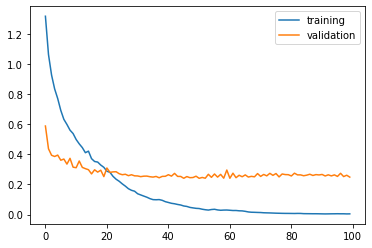

In [23]:
plt.plot(history.history['loss'], label = 'training')
plt.plot(history.history['val_loss'], label = 'validation')
plt.legend()

In [10]:
X_train.shape

(1831, 360, 6)

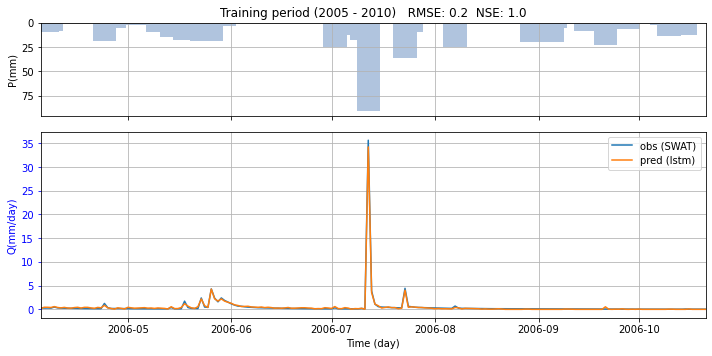

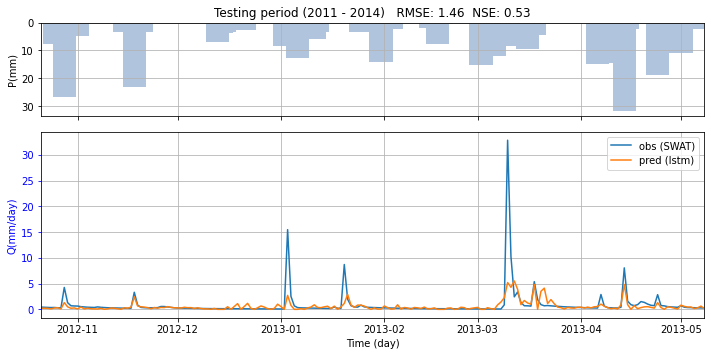

In [24]:
def pred_lstm_streamflow(model):
    """
    Args: 
    model: keras model object
    
    Returns:
    predicted discharge data frame (one for training evaluation, the other is the testing evaluation)
    Evalluate the model.
    """
    
    # During training period. 
    def cal_q(x: np.ndarray, day: List):
        """
        Given an x array has temporal chunks (weather drivers from previous dates)
        returns a dataframe with additional one column (pred_q)
        """
        pred = model.predict(x).flatten()
        pred = pred * q_df_std.Q + q_df_mean.Q # normalize back to a meaningful range. 
        pred[pred < .0] = .0 # lower bound of the prediction is 0. Negative predicted discharge is postprocessed and forced to a range [0, +OO]
        
        result = q_df.loc[day].copy()
        result = result * q_df_std + q_df_mean
        result['lstm'] = pred
        result['date'] = day
        result = result.set_index('date')
        
        return result
    
    def visualize_plot(df: pd.DataFrame, start: int, end: int, prefix: str):
        """
        df is the result that has both swat discharge and predicted discharge. 
        start and end indexes the starting and ending date of the visualization
        prefix is the leading string that names the title of plots. 
        """
        
        # calculate some stats: 
        rmse = np.sqrt(np.mean((df.Q - df.lstm)**2))
        
        # calculate NSE
        def nse():
            denominator = np.mean((df.Q - np.mean(df.Q))**2)
            numerator = np.mean((df.lstm - df.Q)**2)
            
            return 1 - numerator/denominator
        
        nse = nse()
            
        t = df.index[start:end]
        sP = df.PRECIPmm[start:end]

        #     fig = plt.figure(figsize = (20,10))
        fig = plt.figure(figsize = (10,5))
        gs = gridspec.GridSpec(2, 1, height_ratios=[1, 2])

        # HYDROGRAM CHART
        ax = plt.subplot(gs[1])
        ax.plot(t,df.Q[start:end], label = 'obs (SWAT)')
        ax.plot(t,df.lstm[start:end], label = 'pred (lstm)')
        ax.set_ylabel(u'Q(mm/day)', color='b')
        ax.set_xlabel('Time (day)')
        ax.tick_params(axis='y', colors='b')
        ax.xaxis.grid(b=True, which='major', color='.7', linestyle='-')
        ax.yaxis.grid(b=True, which='major', color='.7', linestyle='-')
        ax.set_xlim(min(t), max(t))    
        #     ax.set_ylim(0, np.max(list(plot_df.qsim.iloc[0:600]) + list(plot_df.to_bs.iloc[0:600]))*1.2)

        # PRECIPITATION/HYETOGRAPH CHART
        ax2 = plt.subplot(gs[0])
        ax2.bar(t, sP, 7, color='#b0c4de')
        ax2.xaxis.grid(b=True, which='major', color='.7', linestyle='-')
        ax2.yaxis.grid(b=True, which='major', color='0.7', linestyle='-')
        ax2.set_ylabel('P(mm)')
        ax2.set_xlim(min(t), max(t))
        plt.setp(ax2.get_xticklabels(), visible=False)

        plt.tight_layout()
        ax2.invert_yaxis()
        plt.gcf().subplots_adjust(bottom=0.15)
        plt.title(prefix + '   RMSE: ' + str(round(rmse, 2)) + '  NSE: ' + str(round(nse, 2)))
        ax.legend()
    
    
    # Now execute those 2 functions. 
    df_trn = cal_q(x = X_train, day = list(trn.iloc[(global_setting['time_steps']-1):(trn.shape[0]-1)].index))
    visualize_plot(df = df_trn, start = 100, end = 300, prefix='Training period (2005 - 2010)')
    
    df_tst = cal_q(x = X_test, day = list(tst.iloc[(global_setting['time_steps']-1):(tst.shape[0]-1)].index))
    visualize_plot(df = df_tst, start = 300, end = 500, prefix='Testing period (2011 - 2014)')
    
    return df_trn, df_tst

_, lstm_tst = pred_lstm_streamflow(lstm)


Did you see a performance increase in LSTM? 
Let's make the comparison more straightforward!

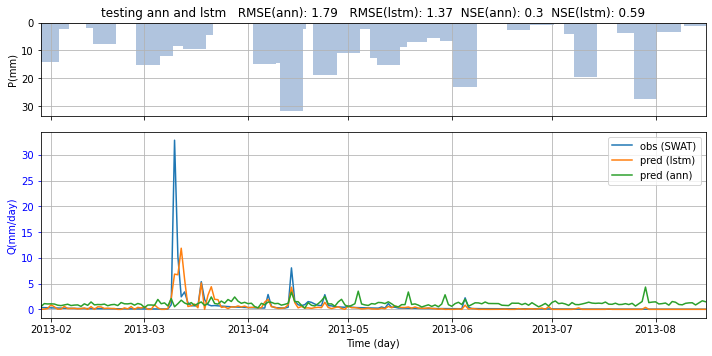

In [13]:
lstm_compare_to_ann = lstm_tst[['Q', 'lstm', 'PRECIPmm']].merge(ann_tst[['ann']], left_index = True, right_index = True)
def visualize_plot_ann_lstm(df: pd.DataFrame, start: int, end: int, prefix: str):
        """
        df is the result that has both swat discharge and predicted discharge. 
        start and end indexes the starting and ending date of the visualization
        prefix is the leading string that names the title of plots. 
        """
        
        # calculate some stats: 
        rmse = np.sqrt(np.mean((df.Q - df.lstm)**2))
        rmse_ann = np.sqrt(np.mean((df.Q - df.ann)**2))
        
        # calculate NSE
        def nse(pred_col: str):
            denominator = np.mean((df.Q - np.mean(df.Q))**2)
            numerator = np.mean((df[pred_col] - df.Q)**2)
            
            return 1 - numerator/denominator
        
        nse_lstm = nse('lstm')
        nse_ann = nse('ann')
            
        t = df.index[start:end]
        sP = df.PRECIPmm[start:end]

        fig = plt.figure(figsize = (10,5))
        gs = gridspec.GridSpec(2, 1, height_ratios=[1, 2])

        # HYDROGRAM CHART
        ax = plt.subplot(gs[1])
        ax.plot(t,df.Q[start:end], label = 'obs (SWAT)')
        ax.plot(t,df.lstm[start:end], label = 'pred (lstm)')
        ax.plot(t,df.ann[start:end], label = 'pred (ann)')
        ax.set_ylabel(u'Q(mm/day)', color='b')
        ax.set_xlabel('Time (day)')
        ax.tick_params(axis='y', colors='b')
        ax.xaxis.grid(b=True, which='major', color='.7', linestyle='-')
        ax.yaxis.grid(b=True, which='major', color='.7', linestyle='-')
        ax.set_xlim(min(t), max(t))    
        #     ax.set_ylim(0, np.max(list(plot_df.qsim.iloc[0:600]) + list(plot_df.to_bs.iloc[0:600]))*1.2)

        # PRECIPITATION/HYETOGRAPH CHART
        ax2 = plt.subplot(gs[0])
        ax2.bar(t, sP, 7, color='#b0c4de')
        ax2.xaxis.grid(b=True, which='major', color='.7', linestyle='-')
        ax2.yaxis.grid(b=True, which='major', color='0.7', linestyle='-')
        ax2.set_ylabel('P(mm)')
        ax2.set_xlim(min(t), max(t))
        plt.setp(ax2.get_xticklabels(), visible=False)

        plt.tight_layout()
        ax2.invert_yaxis()
        plt.gcf().subplots_adjust(bottom=0.15)
        plt.title(prefix + '   RMSE(ann): ' + str(round(rmse_ann, 2)) + '   RMSE(lstm): ' + str(round(rmse, 2)) + 
                  '  NSE(ann): ' + str(round(nse_ann, 2)) + '  NSE(lstm): ' + str(round(nse_lstm, 2)))
        ax.legend()

visualize_plot_ann_lstm(df = lstm_compare_to_ann, start = 400, end = 600, prefix='testing ann and lstm')